In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from perceptron import Perceptron
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.01):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('green','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmpa=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.xlim(xx2.min(),xx2.max())
    #plot class samples
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y == cl,1],alpha=0.8,  marker=markers[idx],label=cl)

df = pd.read_csv("IrisData.csv")
df_filtered = df[df.iloc[0:,4].isin(["'versicolor'","'virginica'"])]
df_shuffled = df_filtered.sample(frac=1)
print(df_shuffled)
#df.tail()
y = df_shuffled.iloc[0:,4].values
#print(y)
y = np.where(y == "'versicolor'", -1 ,1)
#print (y)
X = df_shuffled.iloc[0:, [2,3]].values
#print(X)


     Sepal length  Sepal Width  Petal Length  Petal Width         Class
115           6.4          3.2           5.3          2.3   'virginica'
83            6.0          2.7           5.1          1.6  'versicolor'
144           6.7          3.3           5.7          2.5   'virginica'
62            6.0          2.2           4.0          1.0  'versicolor'
95            5.7          3.0           4.2          1.2  'versicolor'
..            ...          ...           ...          ...           ...
122           7.7          2.8           6.7          2.0   'virginica'
118           7.7          2.6           6.9          2.3   'virginica'
140           6.7          3.1           5.6          2.4   'virginica'
64            5.6          2.9           3.6          1.3  'versicolor'
91            6.1          3.0           4.6          1.4  'versicolor'

[100 rows x 5 columns]


In [5]:
ppn=Perceptron(eta=0.01,n_iter=100)
ppn.fit(X,y)
print(ppn.errors_)

[48, 41, 31, 29, 29, 22, 32, 26, 29, 22, 22, 29, 13, 29, 13, 18, 22, 22, 18, 22, 17, 15, 15, 15, 15, 13, 20, 17, 15, 15, 17, 15, 11, 17, 15, 15, 17, 13, 13, 13, 13, 15, 15, 15, 17, 15, 15, 15, 15, 13, 17, 15, 13, 17, 15, 13, 8, 13, 15, 8, 13, 13, 8, 15, 13, 8, 15, 13, 8, 15, 13, 8, 15, 11, 13, 8, 11, 8, 13, 8, 13, 8, 13, 8, 13, 8, 13, 8, 13, 8, 11, 8, 13, 10, 11, 8, 13, 10, 11, 8]


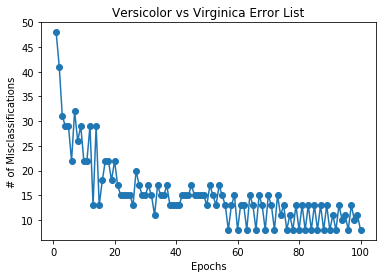

In [6]:
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_, marker='o')
#plt.xlabel = 'Epochs'
#plt.ylabel = '# of Misclassifications'
plt.xlabel('Epochs')
plt.ylabel('# of Misclassifications')
plt.title('Versicolor vs Virginica Error List')
plt.show()


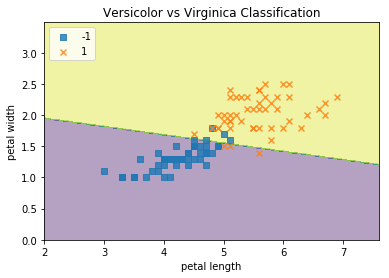

In [23]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.xlim(2,7.6)
plt.title('Versicolor vs Virginica Classification')
plt.show()